In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outliar_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global solera,sector 107,0.50,7752.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,South-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15,215.000000
1,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49,345.000000
2,flat,vatika gurgaon,sector 83,1.19,7438.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,NaN,1600.0,0,1,0,0,0,1,35,533.333333
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,998.0,Super Built up area 1200(111.48 sq.m.)Built Up...,2,2,2,5.0,North,Relatively New,1200.0,1188.0,998.0,0,0,0,1,0,1,82,499.000000
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101,754.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

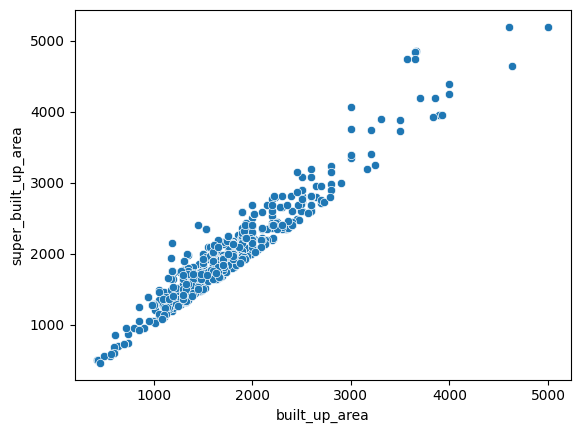

In [ ]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

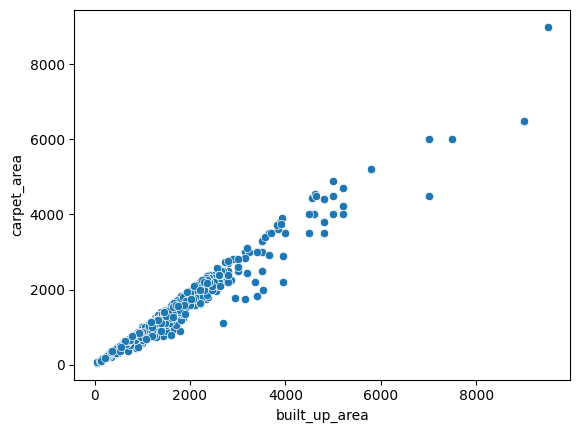

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df.carpet_area)

In [10]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [11]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
all_present_df.shape

(531, 24)

In [13]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [14]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [15]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [16]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [17]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
27,flat,pivotal riddhi siddhi,sector 99,0.40,4444.0,900.0,Super Built up area 900(83.61 sq.m.)Carpet are...,2,2,2,9.0,NaN,New Property,900.0,NaN,587.0,0,0,0,0,0,0,60,450.000000
37,flat,supertech araville,sector 79,0.71,6063.0,1171.0,Super Built up area 1295(120.31 sq.m.)Carpet a...,2,2,3+,17.0,North,New Property,1295.0,NaN,1250.0,0,0,0,0,1,0,53,585.500000
39,flat,ireo the corridors,sector 67a,1.60,9265.0,1727.0,Super Built up area 1727(160.44 sq.m.)Carpet a...,3,3,2,3.0,North,New Property,1727.0,NaN,1017.0,0,0,1,0,0,1,142,575.666667
43,flat,shapoorji pallonji joyville gurugram,sector 102,1.20,14563.0,824.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,1359.0,NaN,824.0,0,0,0,0,0,0,49,412.000000
49,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,2,26,682.333333


In [18]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_19056\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_19056\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [19]:
df.update(sbc_df)

In [20]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [22]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,ardee city,sector 52,1.50,9146.0,1640.0,Super Built up area 1640(152.36 sq.m.),4,4,3,3.0,NaN,Old Property,1640.0,NaN,NaN,0,0,0,0,0,0,65,410.000000
7,flat,tarc maceo,sector 91,0.96,5411.0,1774.0,Super Built up area 1404(130.44 sq.m.),2,2,3+,8.0,East,Moderately Old,1404.0,NaN,NaN,0,0,0,0,0,0,85,887.000000
12,flat,ild greens,sector 37c,1.00,4724.0,2117.0,Super Built up area 1800(167.23 sq.m.),3,3,3,3.0,NaN,Under Construction,1800.0,NaN,NaN,0,0,0,0,0,0,51,705.666667
14,flat,ansal api esencia,sector 67,1.00,6435.0,1554.0,Super Built up area 1554(144.37 sq.m.),3,3,3+,2.0,NaN,Moderately Old,1554.0,NaN,NaN,0,0,0,0,0,0,9,518.000000
18,flat,tulip violet,sector 69,1.40,8872.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,11.0,North,Relatively New,1578.0,NaN,NaN,0,0,0,1,0,0,126,526.000000


In [23]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_19056\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_19056\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [24]:
df.update(sb_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global solera,sector 107,0.50,7752.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,South-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15,215.000000
1,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49,345.000000
2,flat,vatika gurgaon,sector 83,1.19,7438.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,NaN,1600.0,0,1,0,0,0,1,35,533.333333
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101,754.000000
5,flat,jmd gardens,sector 33,3.25,7509.0,4328.0,Carpet area: 4328 (402.08 sq.m.),4,4,3+,17.0,South-East,Old Property,NaN,NaN,4328.0,0,1,0,0,0,1,130,1082.000000


In [28]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_19056\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_19056\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [29]:
df.update(c_df)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

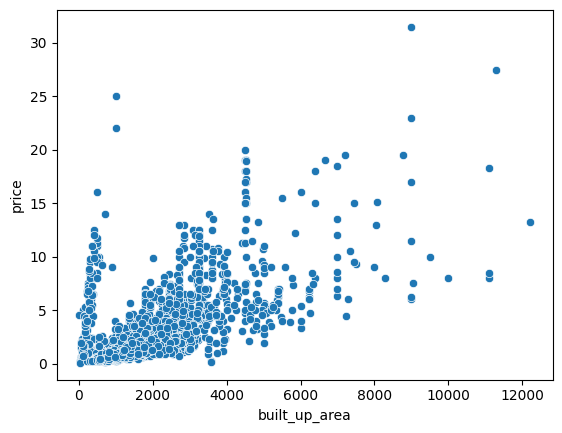

In [31]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
1776,5.80,1935.0,1935.0
2450,11.00,2700.0,361.0
3422,4.25,1600.0,1778.0
2472,7.25,3240.0,360.0
2601,5.80,1800.0,1800.0


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [35]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

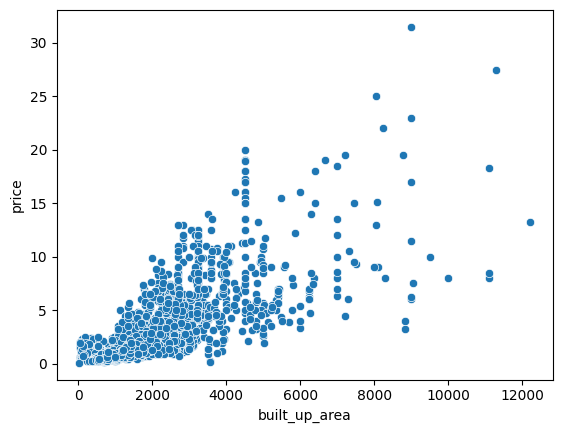

In [37]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [38]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7752.0,3,2,2,6.0,South-East,Relatively New,717.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6812.0,2,2,1,0.0,East,New Property,767.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7438.0,3,3,2,10.0,South,Relatively New,1778.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,2,2,2,5.0,North,Relatively New,1188.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,2,2,3,31.0,NaN,Under Construction,1676.0,0,0,0,0,0,0,101


In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### **floorNum**

In [41]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
188,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
626,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
833,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
865,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
877,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1126,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
1376,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1440,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1494,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
1865,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28


In [42]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [43]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_19056\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### **facing**

In [45]:
1011/df.shape[0]

0.2843881856540084

<Axes: ylabel='count'>

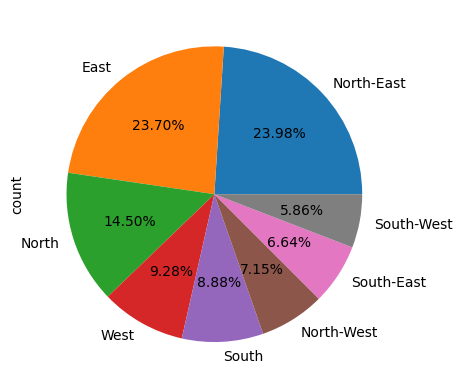

In [46]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [47]:
df.drop(columns=['facing'],inplace=True)

In [48]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
14,flat,ansal api esencia,sector 67,1.00,6435.0,3,3,3+,2.0,Moderately Old,1406.0,0,0,0,0,0,0,9
1841,flat,bestech park view ananda,sector 81,1.10,6687.0,3,2,3+,5.0,Relatively New,1319.0,0,0,0,0,0,0,150
3002,house,vipul tatvam villa,sector 48,7.35,22812.0,4,5,2,2.0,Moderately Old,3222.0,1,1,1,1,0,1,144
2679,flat,antriksh heights,sector 84,0.90,6207.0,3,3,3+,12.0,Relatively New,1525.0,0,0,0,0,0,0,166
1878,flat,signature global solera,sector 107,0.40,6645.0,2,2,1,7.0,Relatively New,577.0,0,0,0,0,0,1,55


In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [50]:
df[df.society.isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1440,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [51]:
df.drop(index=[1440],inplace=True)

In [52]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### **agePossession**

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           704
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     116
Name: count, dtype: int64

In [54]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
34,flat,breeze global heights,sector 33,0.40,6421.0,2,2,2,4.0,Undefined,623.0,0,0,0,0,0,0,0
60,flat,umang monsoon breeze,sector 78,0.70,5719.0,2,2,2,5.0,Undefined,1224.0,0,0,0,0,0,0,0
74,flat,trisara our homes 3,sohna road,0.40,4479.0,2,2,2,1.0,Undefined,900.0,0,0,0,0,0,0,0
87,house,raj villas,sector 52,8.00,25543.0,6,5,3+,4.0,Undefined,3132.0,0,0,0,0,0,0,0
92,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,flat,m3m skycity,sector 65,2.80,15317.0,3,3,0,14.0,Undefined,1828.0,0,0,0,0,0,0,39
3489,flat,hcbs sports ville,sohna road,0.38,5067.0,2,2,2,9.0,Undefined,750.0,0,0,0,0,0,0,0
3503,house,independent,sector 2,0.70,7778.0,1,1,0,1.0,Undefined,900.0,0,0,0,0,0,0,0
3513,house,unitech uniworld resorts,sector 33,8.00,17778.0,6,5,3+,4.0,Undefined,4500.0,0,0,0,0,0,0,0


In [55]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1714
New Property           763
Moderately Old         583
Old Property           325
Under Construction     116
Undefined               53
Name: count, dtype: int64

In [58]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1724
New Property           763
Moderately Old         590
Old Property           328
Under Construction     116
Undefined               33
Name: count, dtype: int64

In [61]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [62]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [63]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           763
Moderately Old         621
Old Property           328
Under Construction     116
Name: count, dtype: int64

In [64]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [67]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [66]:
df.shape

(3554, 18)